In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Data Preparation

In [ ]:
maleData = pd.read_csv("./maleDigits.csv")
maleData.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,...,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,...,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,...,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,...,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,112


In [ ]:
femaleData = pd.read_csv("./femaleDigits.csv")
femaleData.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
15617,0,1,0,0,1,0,2,1,0,0,...,23,1,2,0,0,0,0,0,0,121
15618,0,0,0,3,1,198,223,14,2,2,...,1,0,0,0,3,1,1,0,1,121
15619,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,121
15620,1,1,1,1,1,1,1,5,5,5,...,0,0,0,0,0,0,0,0,0,121
15621,1,2,0,0,0,1,4,3,3,3,...,0,2,3,0,2,0,0,1,0,121


In [ ]:
maleData['label'] = maleData['label'] - 112
femaleData['label'] = femaleData['label'] - 112
maleData.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
15203,125,146,133,134,128,107,119,122,72,69,...,0,0,0,0,0,0,0,0,0,9
15204,0,0,0,0,0,1,1,5,47,56,...,0,0,0,0,0,0,0,0,0,9
15205,0,0,0,0,0,0,0,0,0,0,...,0,46,210,238,99,4,4,1,0,9
15206,0,1,1,4,2,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,9
15207,2,0,1,1,1,1,1,1,0,0,...,0,1,2,3,0,179,255,186,14,9


In [ ]:
femaleData.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,...,184,252,254,186,155,60,0,3,1,0
1,0,0,0,0,0,1,1,4,5,0,...,15,0,0,4,4,2,1,1,1,0
2,0,0,1,0,1,0,1,0,1,1,...,30,0,0,0,5,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,2,...,4,2,0,0,1,0,0,0,0,0
4,2,3,12,5,14,16,15,16,5,12,...,0,0,2,3,0,0,0,0,0,0


In [ ]:
df = pd.concat([maleData, femaleData])

In [ ]:
X =  df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X = X.values
y = y.values

In [ ]:
X = X / 255.0

In [ ]:
X

array([[0.        , 0.00784314, 0.        , ..., 0.01568627, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
        0.        ],
       [0.00392157, 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00784314],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.        , 0.        ,
        0.        ],
       [0.00392157, 0.00784314, 0.        , ..., 0.        , 0.00392157,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21581, 784) (21581,) (9249, 784) (9249,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# 1. Logistic Regrassion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(max_iter=1000).fit(X_train_std, y_train)
model_lr.score(X_train_std, y_train)

0.9150178397664612

In [ ]:
model_lr.score(X_test_std, y_test)

0.8089523191696399

## Hyperparameter Tuning on Logistic Regression

In [ ]:
param_grid = [
    {
    'solver': ['lbfgs', 'liblinear', 'sag']
    }
]

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search_lr.fit(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid=[{'solver': ['lbfgs', 'liblinear', 'sag']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_lr.best_estimator_, grid_search_lr.best_score_

(LogisticRegression(random_state=42, solver='sag'), 0.824706577418886)

In [ ]:
pd.DataFrame(grid_search_lr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.424104,0.646956,0.022447,0.007198,lbfgs,{'solver': 'lbfgs'},0.815381,0.816960,0.797498,0.802595,...,0.806820,0.007841,3,0.920007,0.918564,0.922270,0.918737,0.921691,0.920254,0.001507
1,369.436814,13.745821,0.023377,0.005078,liblinear,{'solver': 'liblinear'},0.825573,0.825765,0.811631,0.808619,...,0.817663,0.007032,2,0.902977,0.902288,0.905474,0.904605,0.903388,0.903746,0.001146
2,81.053160,0.535391,0.023450,0.005060,sag,{'solver': 'sag'},0.832059,0.831789,0.819277,0.818350,...,0.824707,0.006019,1,0.905700,0.907617,0.909991,0.909065,0.908427,0.908160,0.001455


## Evaluating model with best parameters

In [ ]:
model_lr = LogisticRegression(solver='sag', max_iter=1000).fit(X_train_std, y_train)
model_lr.score(X_train_std, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.913349705759696

In [ ]:
model_lr.score(X_test_std, y_test)

0.8105741161206617

In [ ]:
y_pred_lr = model_lr.predict(X_test_std)

In [ ]:
con_mx_lr = confusion_matrix(y_test, y_pred_lr)
con_mx_lr

array([[789,  20,  10,  27,   9,  29,   5,  14,  11,  11],
       [ 17, 740,  20,  12,  15,  14,   9,   6,  23,  69],
       [ 10,  14, 772,   2,  29,  18,   9,  35,  12,  22],
       [ 33,  16,   9, 712,   5,  26,  80,  10,  15,  21],
       [ 11,  11,  26,  11, 776,  27,   9,  14,  27,  14],
       [ 16,  19,  21,  17,  23, 713,  59,  19,  18,  19],
       [ 14,  13,  12,  71,  11,  49, 701,  15,  17,  22],
       [ 14,   3,  22,   8,  22,  19,   6, 796,  12,  24],
       [  8,   6,  10,  14,  12,  12,  15,   6, 819,  24],
       [ 13,  67,  26,  34,  11,  14,  21,  22,  35, 679]])

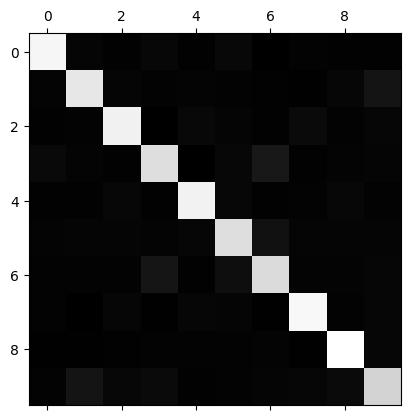

In [ ]:
plt.matshow(con_mx_lr, cmap=plt.cm.gray);

# 2. SVM

In [ ]:
from sklearn.svm import SVC
model_svc = SVC().fit(X_train, y_train)
model_svc.score(X_train, y_train)

0.9494462721838655

In [ ]:
model_svc.score(X_test, y_test)

0.9083144123689048

In [ ]:
model_svc_std = SVC().fit(X_train_std, y_train)
model_svc_std.score(X_train_std, y_train)

0.9625133219035262

In [ ]:
model_svc_std.score(X_test_std, y_test)

0.9115580062709482

## Hyperparameter Tuning on Suport Vector Classifier

In [ ]:
param_grid = [
    {
    'kernel': ['rbf', 'poly']
    }
]

grid_search_svc = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search_svc.fit(X_train_std, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'kernel': ['rbf', 'poly']}], return_train_score=True,
             scoring='accuracy')

In [ ]:
grid_search_svc.best_estimator_, grid_search_svc.best_score_

(SVC(random_state=42), 0.9042212667169142)

In [ ]:
pd.DataFrame(grid_search_svc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,83.864124,1.153175,60.012382,2.972504,rbf,{'kernel': 'rbf'},0.904921,0.904365,0.903378,0.904221,0.000638,1,0.959199,0.959060,0.957743,0.958667,0.000656
1,129.951146,4.215732,48.638007,1.922936,poly,{'kernel': 'poly'},0.903253,0.901168,0.900737,0.901719,0.001099,2,0.959894,0.963161,0.963511,0.962189,0.001629


## Evaluating model with best parameters

In [ ]:
model_svc = SVC().fit(X_train_std, y_train)
model_svc.score(X_train_std, y_train)

0.9625133219035262

In [ ]:
model_svc.score(X_test_std, y_test)

0.9115580062709482

In [ ]:
y_pred_svc = model_svc.predict(X_test_std)

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       925
           1       0.93      0.88      0.91       925
           2       0.89      0.93      0.91       923
           3       0.94      0.88      0.91       927
           4       0.93      0.92      0.93       926
           5       0.93      0.88      0.90       924
           6       0.89      0.90      0.90       925
           7       0.89      0.94      0.92       926
           8       0.91      0.96      0.94       926
           9       0.88      0.90      0.89       922

    accuracy                           0.91      9249
   macro avg       0.91      0.91      0.91      9249
weighted avg       0.91      0.91      0.91      9249



In [ ]:
con_mx_svc = confusion_matrix(y_test, y_pred_svc)
con_mx_svc

array([[852,   5,   8,  15,   3,  13,   5,  13,   7,   4],
       [ 11, 818,  17,   0,   6,   1,   8,   3,  17,  44],
       [  6,  11, 861,   1,   9,   5,   2,  15,   4,   9],
       [ 25,   5,   5, 816,   2,  13,  30,   8,  12,  11],
       [  5,   3,   7,   3, 851,   7,   9,  16,  16,   9],
       [  5,   5,   7,   3,  14, 810,  35,  23,   8,  14],
       [  4,   3,  10,  23,   3,  17, 833,  16,   6,  10],
       [  4,   1,  21,   1,  11,   2,   0, 872,   6,   8],
       [  2,   2,   4,   4,   8,   3,   2,   5, 887,   9],
       [  1,  25,  26,   3,   6,   4,  12,   6,   8, 831]])

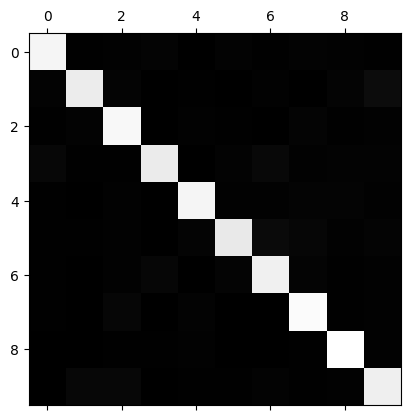

In [ ]:
plt.matshow(con_mx_svc, cmap=plt.cm.gray);

# 3. Decison Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
model_dt.score(X_train, y_train)

1.0

In [ ]:
model_dt.score(X_test, y_test)

0.7794356146610444

## Hyperparameter Tuning on Decision Tree

In [ ]:
param_grid = [
    {
    'criterion': ['gini', 'entropy', 'log_loss']
    }
]

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss']}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_dt.best_estimator_, grid_search_dt.best_score_

(DecisionTreeClassifier(criterion='entropy', random_state=42),
 0.7874518020002226)

In [ ]:
pd.DataFrame(grid_search_dt.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.169756,0.302804,0.024707,0.010261,gini,{'criterion': 'gini'},0.764387,0.758549,0.755179,0.759371,0.003804,3,1.0,1.0,1.0,1.0,0.0
1,9.599639,0.826877,0.015249,0.001064,entropy,{'criterion': 'entropy'},0.793995,0.783570,0.784791,0.787452,0.004654,1,1.0,1.0,1.0,1.0,0.0
2,9.830466,0.385858,0.020219,0.002101,log_loss,{'criterion': 'log_loss'},0.793995,0.783570,0.784791,0.787452,0.004654,1,1.0,1.0,1.0,1.0,0.0


## Evaluating model with best parameters

In [ ]:
model_dt = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
model_dt.score(X_train, y_train)

1.0

In [ ]:
model_dt.score(X_test, y_test)

0.8040869283165748

In [ ]:
y_pred_dt = model_dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       925
           1       0.79      0.78      0.78       925
           2       0.82      0.87      0.84       923
           3       0.79      0.79      0.79       927
           4       0.81      0.80      0.80       926
           5       0.78      0.76      0.77       924
           6       0.79      0.77      0.78       925
           7       0.89      0.86      0.87       926
           8       0.84      0.88      0.86       926
           9       0.69      0.68      0.69       922

    accuracy                           0.80      9249
   macro avg       0.80      0.80      0.80      9249
weighted avg       0.80      0.80      0.80      9249



In [ ]:
con_mx_dt = confusion_matrix(y_test, y_pred_dt)
con_mx_dt

array([[796,  15,   9,  20,  10,  32,  10,   6,   8,  19],
       [ 13, 727,  13,  11,  24,  13,  13,   5,  19,  87],
       [  8,  21, 793,   5,  22,  13,  13,  20,   5,  23],
       [ 31,  20,  11, 725,  10,  22,  46,   8,  20,  34],
       [ 24,  23,  20,   9, 732,  27,  16,  18,  25,  32],
       [ 32,  16,  26,  26,  28, 698,  55,  12,  11,  20],
       [ 10,  12,  12,  61,  10,  58, 713,   8,  18,  23],
       [  8,   8,  37,   6,  17,   9,   6, 803,   7,  25],
       [  6,  13,   6,  11,  20,  13,   9,   7, 818,  23],
       [ 19,  77,  30,  35,  22,  22,  27,  23,  32, 635]])

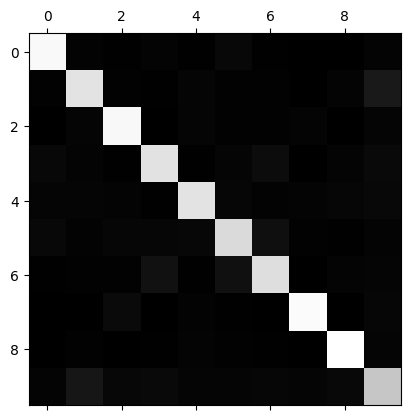

In [ ]:
plt.matshow(con_mx_dt, cmap=plt.cm.gray);

# 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier().fit(X_train, y_train)
model_rf.score(X_train, y_train)

1.0

In [ ]:
model_rf.score(X_test, y_test)

0.9068007352146178

## Hyperparameter Tuning on Random Forest

In [ ]:
param_grid = [
    {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss']
    }
]

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'n_estimators': [10, 100, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_search_rf.best_estimator_, grid_search_rf.best_score_

(RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                        random_state=42),
 0.9053797553849209)

In [ ]:
pd.DataFrame(grid_search_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.459473,0.057860,0.050079,0.002081,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.861829,0.854184,0.852217,0.856077,0.004146,9,0.998054,0.998679,0.998332,0.998355,0.000256
1,17.569762,2.926253,0.454180,0.130840,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",0.900751,0.897693,0.897678,0.898707,0.001445,6,1.000000,1.000000,1.000000,1.000000,0.000000
2,79.845188,2.099322,1.562953,0.319848,gini,500,"{'criterion': 'gini', 'n_estimators': 500}",0.904226,0.902141,0.903517,0.903295,0.000866,3,1.000000,1.000000,1.000000,1.000000,0.000000
3,2.009611,0.013553,0.061612,0.011406,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",0.866277,0.857659,0.851800,0.858579,0.005946,7,0.998123,0.998679,0.998401,0.998401,0.000227
4,22.101931,1.288530,0.371416,0.153151,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",0.903253,0.898666,0.900320,0.900746,0.001897,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,108.488951,0.910418,1.199445,0.114499,entropy,500,"{'criterion': 'entropy', 'n_estimators': 500}",0.905894,0.904365,0.905881,0.905380,0.000718,1,1.000000,1.000000,1.000000,1.000000,0.000000
6,2.481268,0.588677,0.075162,0.007801,log_loss,10,"{'criterion': 'log_loss', 'n_estimators': 10}",0.866277,0.857659,0.851800,0.858579,0.005946,7,0.998123,0.998679,0.998401,0.998401,0.000227
7,22.638883,1.527135,0.454073,0.124686,log_loss,100,"{'criterion': 'log_loss', 'n_estimators': 100}",0.903253,0.898666,0.900320,0.900746,0.001897,4,1.000000,1.000000,1.000000,1.000000,0.000000
8,107.805872,2.209413,1.915772,0.661805,log_loss,500,"{'criterion': 'log_loss', 'n_estimators': 500}",0.905894,0.904365,0.905881,0.905380,0.000718,1,1.000000,1.000000,1.000000,1.000000,0.000000


## Evaluating model with best parameters

In [ ]:
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=500, n_jobs=-1,
                        random_state=42).fit(X_train, y_train)
model_rf.score(X_train, y_train)

1.0

In [ ]:
model_rf.score(X_test, y_test)

0.9122067250513569

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       925
           1       0.91      0.89      0.90       925
           2       0.93      0.94      0.93       923
           3       0.96      0.88      0.92       927
           4       0.93      0.91      0.92       926
           5       0.91      0.88      0.90       924
           6       0.91      0.88      0.90       925
           7       0.93      0.94      0.94       926
           8       0.88      0.97      0.92       926
           9       0.84      0.90      0.87       922

    accuracy                           0.91      9249
   macro avg       0.91      0.91      0.91      9249
weighted avg       0.91      0.91      0.91      9249



In [ ]:
con_mx_rf = confusion_matrix(y_test, y_pred_rf)
con_mx_rf

array([[851,  11,   4,   8,   6,  13,   2,   9,   7,  14],
       [  4, 820,   8,   0,   7,   3,   7,   2,  22,  52],
       [  1,   9, 871,   0,   9,   3,   2,  10,   8,  10],
       [ 23,   4,   3, 812,   1,  13,  27,   6,  21,  17],
       [  4,   5,   7,   0, 844,  11,   5,  11,  20,  19],
       [  7,   8,  11,   1,  18, 816,  24,  20,   6,  13],
       [  4,   7,   9,  18,   2,  34, 815,   4,  16,  16],
       [  0,   6,  13,   0,  13,   0,   0, 875,   9,  10],
       [  0,   3,   4,   1,   5,   2,   1,   1, 900,   9],
       [  6,  30,  11,   4,   7,   4,  10,   3,  14, 833]])

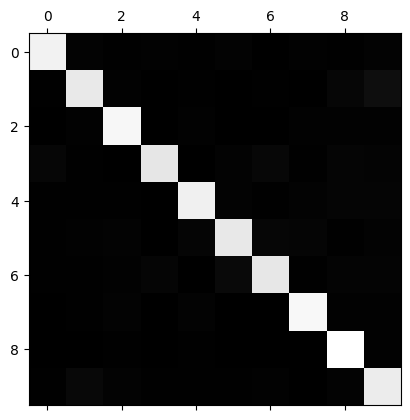

In [ ]:
plt.matshow(con_mx_rf, cmap=plt.cm.gray);

#5. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = RandomForestClassifier().fit(X_train, y_train)
model_knn.score(X_train, y_train)

1.0

In [ ]:
model_knn.score(X_test, y_test)

0.9062601362309439

## Hyperparameter Tuning on KNN

In [ ]:
param_grid = [
    {
    'n_neighbors': [3, 5, 10]
    }
]

grid_search_knn = GridSearchCV(KNeighborsClassifier(n_jobs=-1), param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid=[{'n_neighbors': [3, 5, 10]}], return_train_score=True,
             scoring='accuracy')

In [ ]:
grid_search_knn.best_estimator_, grid_search_knn.best_score_

(KNeighborsClassifier(n_jobs=-1), 0.8827671668711058)

In [ ]:
pd.DataFrame(grid_search_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.107891,0.012665,8.162689,1.711753,3,{'n_neighbors': 3},0.882819,0.879622,0.880856,0.881099,0.001316,2,0.938139,0.939320,0.940019,0.939159,0.000776
1,0.078693,0.018922,6.948121,1.037456,5,{'n_neighbors': 5},0.885182,0.882124,0.880995,0.882767,0.001769,1,0.925488,0.924515,0.925910,0.925305,0.000584
2,0.082607,0.013303,7.325384,0.794945,10,{'n_neighbors': 10},0.877259,0.870448,0.871959,0.873222,0.002921,3,0.901022,0.904567,0.906102,0.903897,0.002128


## Evaluatoing model with best parameters

In [ ]:
# same as default parameters

In [ ]:
y_pred_knn = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       925
           1       0.91      0.88      0.90       925
           2       0.93      0.94      0.93       923
           3       0.95      0.87      0.91       927
           4       0.93      0.91      0.92       926
           5       0.90      0.88      0.89       924
           6       0.91      0.87      0.89       925
           7       0.92      0.94      0.93       926
           8       0.87      0.97      0.92       926
           9       0.83      0.88      0.85       922

    accuracy                           0.91      9249
   macro avg       0.91      0.91      0.91      9249
weighted avg       0.91      0.91      0.91      9249



In [ ]:
con_mx_knn = confusion_matrix(y_test, y_pred_knn)
con_mx_knn

array([[849,  12,   4,   6,   7,  13,   2,   7,   6,  19],
       [  5, 816,   9,   0,  10,   2,   6,   3,  20,  54],
       [  2,  10, 860,   0,   9,   4,   2,  14,   7,  15],
       [ 23,   8,   2, 805,   5,  16,  35,   6,  14,  13],
       [  6,   7,   6,   1, 838,  10,   4,  12,  26,  16],
       [  7,   9,   7,   4,  23, 807,  27,  18,  10,  12],
       [  6,   6,  11,  31,   2,  34, 800,   4,  15,  16],
       [  0,   5,  16,   0,  15,   1,   0, 870,  11,   8],
       [  0,   3,   3,   2,   7,   2,   5,   0, 893,  11],
       [  5,  33,  12,   3,  10,   6,   9,   6,  16, 822]])

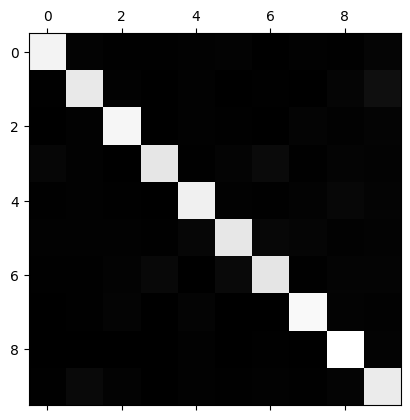

In [ ]:
plt.matshow(con_mx_knn, cmap=plt.cm.gray);

#ANN

In [ ]:
import torch
from torch import nn

In [ ]:
# Turn data in Tensors to work with pytorch
X_train = torch.from_numpy(X_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

In [ ]:
X_train.shape

torch.Size([21581, 784])

## 1.0 ModelV0

In [ ]:
class ModelV0(nn.Module):
  def __init__(self, input=784, output=10, hidden_units=10):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input, out_features=hidden_units),
        #nn.ReLU(), # For non-Linear activation
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        #nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

modelv0 = ModelV0()
modelv0

ModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelv0.parameters(), lr=0.1)

In [ ]:
torch.manual_seed = 42
#torch.cuda.manual_seed = 42

epochs = 5001
losses = []
for epoch in range(epochs):
  modelv0.train()

  y_train_logits = modelv0(X_train)
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_train_logits, y_train)
  #print(f"Epoch: {epoch} | Loss: {loss}")
  #losses.append(loss.numpy)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 2.336717367172241
Epoch: 100 | Loss: 0.7786896824836731
Epoch: 200 | Loss: 0.6398218274116516
Epoch: 300 | Loss: 0.594703197479248
Epoch: 400 | Loss: 0.569911003112793
Epoch: 500 | Loss: 0.551988422870636
Epoch: 600 | Loss: 0.5379441380500793
Epoch: 700 | Loss: 0.5269442200660706
Epoch: 800 | Loss: 0.5182422995567322
Epoch: 900 | Loss: 0.5110917687416077
Epoch: 1000 | Loss: 0.5049569606781006
Epoch: 1100 | Loss: 0.4995017945766449
Epoch: 1200 | Loss: 0.49451732635498047
Epoch: 1300 | Loss: 0.4898681640625
Epoch: 1400 | Loss: 0.48545995354652405
Epoch: 1500 | Loss: 0.48122015595436096
Epoch: 1600 | Loss: 0.47708660364151
Epoch: 1700 | Loss: 0.47299906611442566
Epoch: 1800 | Loss: 0.4688946306705475
Epoch: 1900 | Loss: 0.46470820903778076
Epoch: 2000 | Loss: 0.4603857398033142
Epoch: 2100 | Loss: 0.4559169113636017
Epoch: 2200 | Loss: 0.45137542486190796
Epoch: 2300 | Loss: 0.44691887497901917
Epoch: 2400 | Loss: 0.44271183013916016
Epoch: 2500 | Loss: 0.4388353526592254

In [ ]:
modelv0.eval()
with torch.inference_mode():
  y_test_logits = modelv0(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.5964551568031311


In [ ]:
n_correct = (y_test == y_test_preds).sum()
print("Accuracy in ModelV0 after training for 10000 epochs:")
print(n_correct / len(y_test))

Accuracy in ModelV0 after training for 10000 epochs:
tensor(0.8275)


## 1.1 ModelV1

In [ ]:
class ModelV1(nn.Module):
  def __init__(self, input=784, output=10, hidden_units=16):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input, out_features=hidden_units),
        #nn.ReLU(), # For non-Linear activation
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        #nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

modelv1 = ModelV1()
modelv1

ModelV1(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=16, bias=True)
    (1): Linear(in_features=16, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelv1.parameters(), lr=0.1)

In [ ]:
torch.manual_seed = 42
#torch.cuda.manual_seed = 42

epochs = 5001
losses = []
for epoch in range(epochs):
  modelv1.train()

  y_train_logits = modelv1(X_train)
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_train_logits, y_train)
  #print(f"Epoch: {epoch} | Loss: {loss}")
  #losses.append(loss.numpy)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 2.313300371170044
Epoch: 100 | Loss: 0.757541835308075
Epoch: 200 | Loss: 0.6394348740577698
Epoch: 300 | Loss: 0.5903387665748596
Epoch: 400 | Loss: 0.5609607696533203
Epoch: 500 | Loss: 0.5413084626197815
Epoch: 600 | Loss: 0.5266789197921753
Epoch: 700 | Loss: 0.51496821641922
Epoch: 800 | Loss: 0.5053848028182983
Epoch: 900 | Loss: 0.49748495221138
Epoch: 1000 | Loss: 0.49081897735595703
Epoch: 1100 | Loss: 0.48500630259513855
Epoch: 1200 | Loss: 0.4797883629798889
Epoch: 1300 | Loss: 0.47500038146972656
Epoch: 1400 | Loss: 0.47053593397140503
Epoch: 1500 | Loss: 0.4663236737251282
Epoch: 1600 | Loss: 0.46231430768966675
Epoch: 1700 | Loss: 0.45847275853157043
Epoch: 1800 | Loss: 0.45477384328842163
Epoch: 1900 | Loss: 0.45119884610176086
Epoch: 2000 | Loss: 0.4477335512638092
Epoch: 2100 | Loss: 0.44436734914779663
Epoch: 2200 | Loss: 0.4410916268825531
Epoch: 2300 | Loss: 0.43789955973625183
Epoch: 2400 | Loss: 0.43478530645370483
Epoch: 2500 | Loss: 0.4317440688

In [ ]:
modelv1.eval()
with torch.inference_mode():
  y_test_logits = modelv1(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.5974650382995605


In [ ]:
n_correct = (y_test == y_test_preds).sum()
print("Accuracy in ModelV0 after training for 10000 epochs:")
print(n_correct / len(y_test))

Accuracy in ModelV0 after training for 10000 epochs:
tensor(0.8285)


## 1.2 ModelV2

In [ ]:
class ModelV2(nn.Module):
  def __init__(self, input=784, output=10, hidden_units=100):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input, out_features=hidden_units),
        #nn.ReLU(), # For non-Linear activation
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        #nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

modelv2 = ModelV2()
modelv2

ModelV2(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelv2.parameters(), lr=0.1)

In [ ]:
torch.manual_seed = 42
#torch.cuda.manual_seed = 42

epochs = 5001
losses = []
for epoch in range(epochs):
  modelv2.train()

  y_train_logits = modelv2(X_train)
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_train_logits, y_train)
  #print(f"Epoch: {epoch} | Loss: {loss}")
  #losses.append(loss.numpy)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 2.312450885772705
Epoch: 100 | Loss: 0.6602411270141602
Epoch: 200 | Loss: 0.5814125537872314
Epoch: 300 | Loss: 0.5507540106773376
Epoch: 400 | Loss: 0.5317882299423218
Epoch: 500 | Loss: 0.518633246421814
Epoch: 600 | Loss: 0.5087277293205261
Epoch: 700 | Loss: 0.5007126331329346
Epoch: 800 | Loss: 0.4938853681087494
Epoch: 900 | Loss: 0.4878636598587036
Epoch: 1000 | Loss: 0.482420414686203
Epoch: 1100 | Loss: 0.47741037607192993
Epoch: 1200 | Loss: 0.4727354347705841
Epoch: 1300 | Loss: 0.46832677721977234
Epoch: 1400 | Loss: 0.4641346335411072
Epoch: 1500 | Loss: 0.4601224958896637
Epoch: 1600 | Loss: 0.45626330375671387
Epoch: 1700 | Loss: 0.4525364637374878
Epoch: 1800 | Loss: 0.44892674684524536
Epoch: 1900 | Loss: 0.4454222321510315
Epoch: 2000 | Loss: 0.4420137405395508
Epoch: 2100 | Loss: 0.4386938512325287
Epoch: 2200 | Loss: 0.43545660376548767
Epoch: 2300 | Loss: 0.4322968125343323
Epoch: 2400 | Loss: 0.42921000719070435
Epoch: 2500 | Loss: 0.426192224025

In [ ]:
modelv2.eval()
with torch.inference_mode():
  y_test_logits = modelv2(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.6336754560470581


In [ ]:
n_correct = (y_test == y_test_preds).sum()
print("Accuracy in ModelV0 after training for 10000 epochs:")
print(n_correct / len(y_test))

Accuracy in ModelV0 after training for 10000 epochs:
tensor(0.8174)


## 1.3 ModelV3

In [ ]:
class ModelV3(nn.Module):
  def __init__(self, input=784, output=10):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input, out_features=24),
        nn.ReLU(), # For non-Linear activation
        nn.Linear(in_features=24, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=output)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

modelv3 = ModelV3()
modelv3

ModelV3(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelv3.parameters(), lr=0.1)

In [ ]:
torch.manual_seed = 42
#torch.cuda.manual_seed = 42

epochs = 4201
losses = []
for epoch in range(epochs):
  modelv3.train()

  y_train_logits = modelv3(X_train)
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_train_logits, y_train)
  #print(f"Epoch: {epoch} | Loss: {loss}")
  #losses.append(loss.numpy)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 2.318840503692627
Epoch: 100 | Loss: 1.3975337743759155
Epoch: 200 | Loss: 0.7319480776786804
Epoch: 300 | Loss: 0.620658814907074
Epoch: 400 | Loss: 0.5550884008407593
Epoch: 500 | Loss: 0.5129600763320923
Epoch: 600 | Loss: 0.47906625270843506
Epoch: 700 | Loss: 0.4509349465370178
Epoch: 800 | Loss: 0.4254324436187744
Epoch: 900 | Loss: 0.39477846026420593
Epoch: 1000 | Loss: 1.6149643659591675
Epoch: 1100 | Loss: 0.35436248779296875
Epoch: 1200 | Loss: 0.3359220325946808
Epoch: 1300 | Loss: 0.32410794496536255
Epoch: 1400 | Loss: 0.302612841129303
Epoch: 1500 | Loss: 0.3434317708015442
Epoch: 1600 | Loss: 0.3041349947452545
Epoch: 1700 | Loss: 0.2828006446361542
Epoch: 1800 | Loss: 0.26921167969703674
Epoch: 1900 | Loss: 1.789843201637268
Epoch: 2000 | Loss: 0.2539733946323395
Epoch: 2100 | Loss: 0.2359623908996582
Epoch: 2200 | Loss: 0.22650828957557678
Epoch: 2300 | Loss: 0.21415114402770996
Epoch: 2400 | Loss: 0.21581053733825684
Epoch: 2500 | Loss: 0.19718989729

In [ ]:
modelv3.eval()
with torch.inference_mode():
  y_test_logits = modelv3(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.4350862503051758


In [ ]:
n_correct = (y_test == y_test_preds).sum()
print("Accuracy in ModelV0 after training for 10000 epochs:")
print(n_correct / len(y_test))

Accuracy in ModelV0 after training for 10000 epochs:
tensor(0.8725)


## 1.4 ModelV4

In [ ]:
class ModelV4(nn.Module):
  def __init__(self, input=784, output=10):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input, out_features=24),
        nn.ReLU(), # For non-Linear activation
        nn.Linear(in_features=24, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=24),
        nn.ReLU(),
        nn.Linear(in_features=24, out_features=output)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

modelv4 = ModelV4()
modelv4

ModelV4(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=24, bias=True)
    (5): ReLU()
    (6): Linear(in_features=24, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelv4.parameters(), lr=0.1)

In [ ]:
torch.manual_seed = 42
#torch.cuda.manual_seed = 42

epochs = 3001
losses = []
for epoch in range(epochs):
  modelv4.train()

  y_train_logits = modelv4(X_train)
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_train_logits, y_train)
  #print(f"Epoch: {epoch} | Loss: {loss}")
  #losses.append(loss.numpy)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 2.309702157974243
Epoch: 100 | Loss: 1.8431657552719116
Epoch: 200 | Loss: 0.9323444366455078
Epoch: 300 | Loss: 0.6855757236480713
Epoch: 400 | Loss: 0.5979053974151611
Epoch: 500 | Loss: 0.548525869846344
Epoch: 600 | Loss: 0.5090497136116028
Epoch: 700 | Loss: 0.4735535681247711
Epoch: 800 | Loss: 0.4462321698665619
Epoch: 900 | Loss: 0.4156475067138672
Epoch: 1000 | Loss: 0.3977346122264862
Epoch: 1100 | Loss: 0.35855892300605774
Epoch: 1200 | Loss: 0.9086057543754578
Epoch: 1300 | Loss: 0.4282926917076111
Epoch: 1400 | Loss: 0.36754176020622253
Epoch: 1500 | Loss: 0.3278812766075134
Epoch: 1600 | Loss: 0.30725428462028503
Epoch: 1700 | Loss: 0.28766486048698425
Epoch: 1800 | Loss: 0.30209189653396606
Epoch: 1900 | Loss: 0.25796282291412354
Epoch: 2000 | Loss: 0.25078245997428894
Epoch: 2100 | Loss: 0.2337474822998047
Epoch: 2200 | Loss: 0.22466890513896942
Epoch: 2300 | Loss: 0.21768340468406677
Epoch: 2400 | Loss: 0.20364443957805634
Epoch: 2500 | Loss: 0.2035289

In [ ]:
modelv4.eval()
with torch.inference_mode():
  y_test_logits = modelv4(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.389506071805954


In [ ]:
n_correct = (y_test == y_test_preds).sum()
print("Accuracy in ModelV4 after training for 3001 epochs:")
print(n_correct / len(y_test))

Accuracy in ModelV4 after training for 3001 epochs:
tensor(0.8899)


## 1.5 ModelV5

In [ ]:
class ModelV5(nn.Module):
  def __init__(self, input=784, output=10):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input, out_features=64),
        nn.ReLU(), # For non-Linear activation
        nn.Linear(in_features=64, out_features=24),
        nn.ReLU(),
        nn.Linear(in_features=24, out_features=16),
        nn.ReLU(),
        nn.Linear(in_features=16, out_features=output)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

modelv5 = ModelV5()
modelv5

ModelV5(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= modelv5.parameters(), lr=0.1)

In [ ]:
torch.manual_seed = 42
#torch.cuda.manual_seed = 42

epochs = 101
losses = []
for epoch in range(epochs):
  modelv5.train()

  y_train_logits = modelv5(X_train)
  y_train_preds = torch.softmax(y_train_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_train_logits, y_train)
  #print(f"Epoch: {epoch} | Loss: {loss}")
  #losses.append(loss.numpy)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if(epoch % 100 == 0):
    print(f"Epoch: {epoch} | Loss: {loss}")

Epoch: 0 | Loss: 0.1251686066389084
Epoch: 100 | Loss: 0.11141736060380936


In [ ]:
n_correct = (y_train == y_train_preds).sum()
print("Training Accuracy in ModelV5:")
print(n_correct / len(y_train))

Training Accuracy in ModelV5:
tensor(0.9700)


In [ ]:
modelv5.eval()
with torch.inference_mode():
  y_test_logits = modelv5(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.38060393929481506


In [ ]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       925
           1       0.89      0.87      0.88       925
           2       0.92      0.93      0.92       923
           3       0.90      0.90      0.90       927
           4       0.90      0.89      0.90       926
           5       0.87      0.87      0.87       924
           6       0.92      0.88      0.90       925
           7       0.90      0.92      0.91       926
           8       0.91      0.94      0.92       926
           9       0.83      0.86      0.85       922

    accuracy                           0.90      9249
   macro avg       0.90      0.90      0.90      9249
weighted avg       0.90      0.90      0.90      9249



In [ ]:
n_correct = (y_test == y_test_preds).sum()
print("Testing Accuracy in ModelV5:")
print(n_correct / len(y_test))

Testing Accuracy in ModelV5:
tensor(0.8961)


In [ ]:
con_mx_ann = confusion_matrix(y_test, y_test_preds)
con_mx_ann

array([[834,  16,   2,  21,   1,  23,   0,  14,   6,   8],
       [  6, 803,  12,   4,   6,   3,   6,   5,  16,  64],
       [  0,   8, 857,   2,  11,  10,   1,  12,   5,  17],
       [ 20,  10,   0, 835,   2,  12,  25,   1,   8,  14],
       [  4,   5,  15,   0, 825,  15,   2,  20,  23,  17],
       [ 16,   6,  10,  13,  22, 804,  27,  13,   7,   6],
       [  4,   4,   4,  38,   1,  40, 814,   3,   4,  13],
       [  4,   2,  16,   2,  16,  14,   0, 852,  10,  10],
       [  7,   3,   1,   7,  16,   4,   0,   8, 868,  12],
       [  4,  49,  14,   9,  13,   4,   9,  15,   9, 796]])

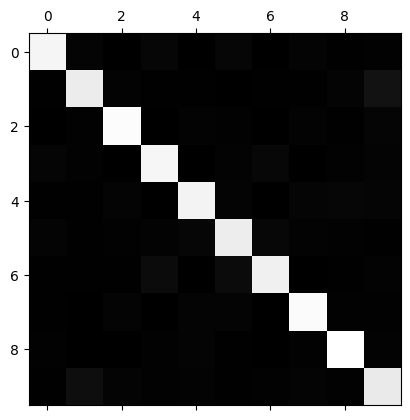

In [ ]:
plt.matshow(con_mx_ann, cmap=plt.cm.gray);

In [ ]:
torch.save(modelv5.state_dict(), "./modelv5")

In [ ]:
model = ModelV5()
model.load_state_dict(torch.load("./modelv5"))
model.eval()

ModelV5(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=24, bias=True)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
model.eval()
with torch.inference_mode():
  y_test_logits = model(X_test)
  y_test_preds = torch.softmax(y_test_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_test_logits, y_test)

print(f"Loss in testing set: {loss}")

Loss in testing set: 0.38060393929481506


# Neural Net Visualization

In [ ]:
!pip install torchviz

In [ ]:
from torchviz import make_dot

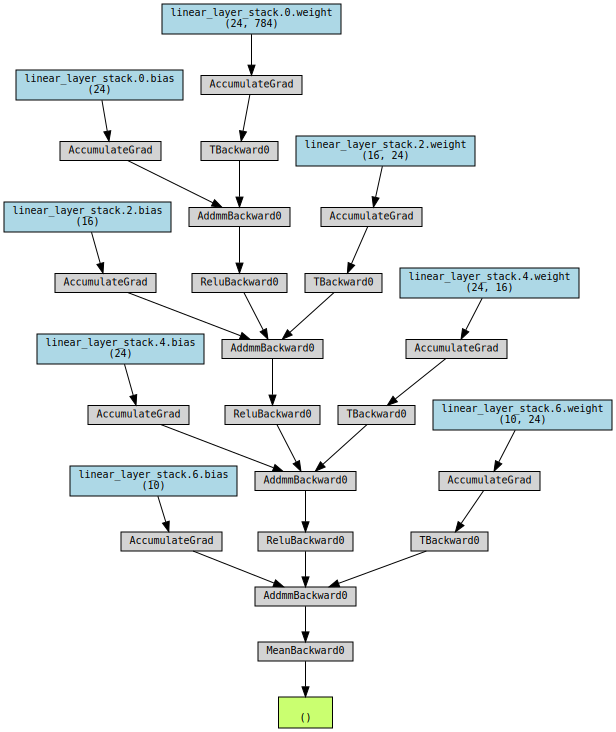

In [ ]:
make_dot(y_train_logits.mean(), params=dict(modelv4.named_parameters()))

In [ ]:
make_dot(y_train_logits.mean(), params=dict(modelv5.named_parameters())).render("modelv5", format="png")

'modelv5.png'